# Ejercicio 06
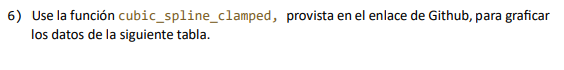  
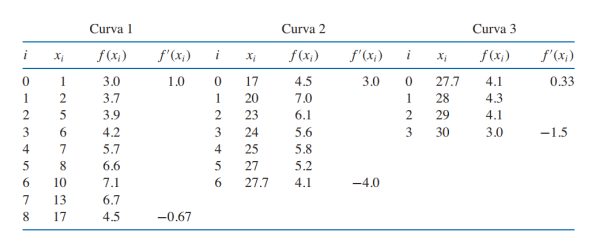

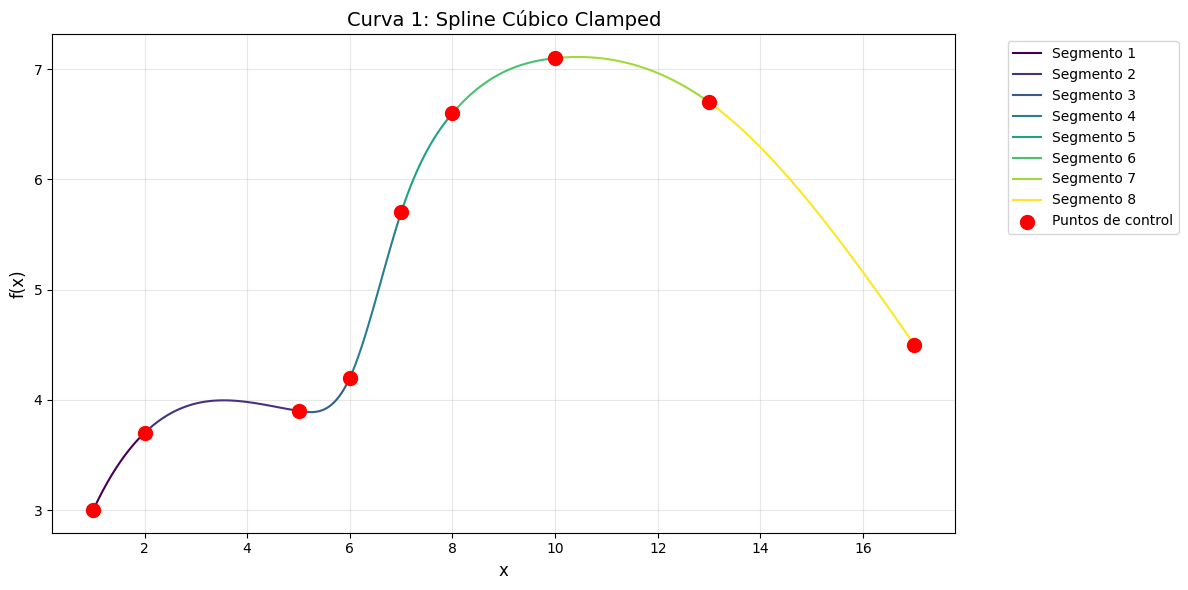

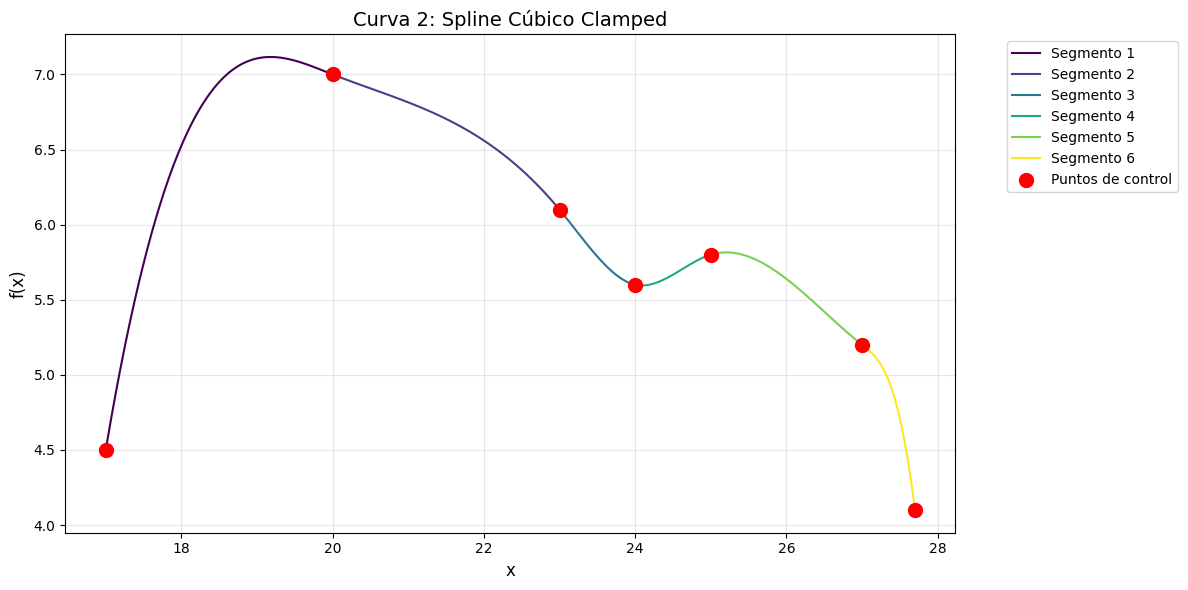

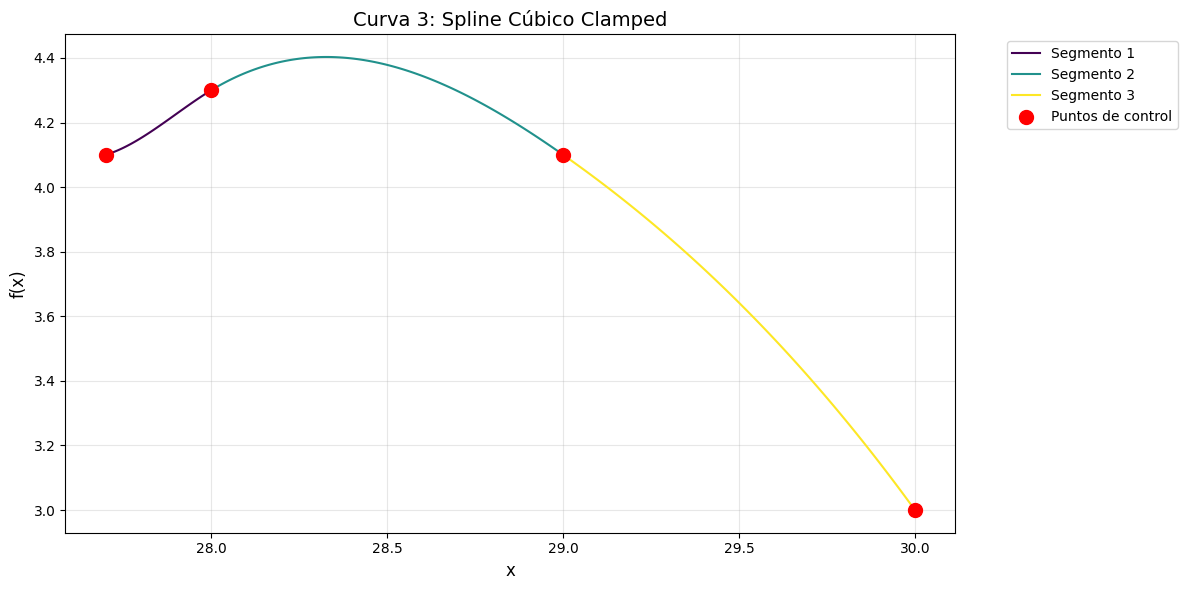


--------------------------------------------------
Ecuaciones para Curva 1:
--------------------------------------------------


<IPython.core.display.Math object>

Forma expandida: 0.0468099653460708 x^{3} - 0.487239861384283 x^{2} + 1.83404982673035 x + 1.60638006930786



<IPython.core.display.Math object>

Forma expandida: 0.0265552121382411 x^{3} - 0.365711342137305 x^{2} + 1.5909927882364 x + 1.7684180949705



<IPython.core.display.Math object>

Forma expandida: 0.341862882832256 x^{3} - 5.09532640254753 x^{2} + 25.2390680902875 x - 37.6450407417814



<IPython.core.display.Math object>

Forma expandida: - 0.574548094033905 x^{3} + 11.4000711810434 x^{2} - 73.7333174112578 x + 160.299730261309



<IPython.core.display.Math object>

Forma expandida: 0.156329493303363 x^{3} - 3.94835815303925 x^{2} + 33.7056879273205 x - 90.3912821953733



<IPython.core.display.Math object>

Forma expandida: 0.0239201086447503 x^{3} - 0.770532921232554 x^{2} + 8.28308607286689 x - 22.5976772501638



<IPython.core.display.Math object>

Forma expandida: - 0.00255606547823463 x^{3} + 0.023752302456995 x^{2} + 0.340233835971401 x + 3.87849687282113



<IPython.core.display.Math object>

Forma expandida: 0.00574178139926946 x^{3} - 0.299863725765665 x^{2} + 4.54724220286598 x - 14.3518727170554


--------------------------------------------------
Ecuaciones para Curva 2:
--------------------------------------------------


<IPython.core.display.Math object>

Forma expandida: 0.12616207628025 x^{3} - 7.53497434135573 x^{2} + 149.806607471118 x - 984.439023122068



<IPython.core.display.Math object>

Forma expandida: - 0.022930673285195 x^{3} + 1.41059063257098 x^{2} - 29.1046920074162 x + 208.302973401493



<IPython.core.display.Math object>

Forma expandida: 0.280127236863149 x^{3} - 19.5004051676648 x^{2} + 451.848211398006 x - 3479.00261937341



<IPython.core.display.Math object>

Forma expandida: - 0.357384536100794 x^{3} + 26.4004424857391 x^{2} - 649.772132283688 x + 5333.96013008014



<IPython.core.display.Math object>

Forma expandida: 0.0882021573401092 x^{3} - 7.0185595223286 x^{2} + 185.702917918006 x - 1628.33195493397



<IPython.core.display.Math object>

Forma expandida: - 2.56800212665878 x^{3} + 208.133987481581 x^{2} - 5623.41585118756 x + 50653.7369670161


--------------------------------------------------
Ecuaciones para Curva 3:
--------------------------------------------------


<IPython.core.display.Math object>

Forma expandida: - 3.79941327466078 x^{3} + 317.993289328931 x^{2} - 8870.74279427938 x + 82483.079611294



<IPython.core.display.Math object>

Forma expandida: 0.296039603960395 x^{3} - 26.0247524752475 x^{2} + 761.762376237622 x - 7420.30198019801



<IPython.core.display.Math object>

Forma expandida: - 0.0653465346534656 x^{3} + 5.41584158415843 x^{2} - 150.014851485149 x + 1393.54455445545


Verificación de condiciones de frontera:
f'(1) calculado: 1.00000000000000, esperado: 1.0
f'(17) calculado: -0.670000000000000, esperado: -0.67

Verificación de condiciones de frontera:
f'(17) calculado: 3.00000000000000, esperado: 3.0
f'(27.7) calculado: -4.00000000000000, esperado: -4.0

Verificación de condiciones de frontera:
f'(27.7) calculado: 0.329999999999998, esperado: 0.33
f'(30) calculado: -1.50000000000000, esperado: -1.5

Verificación de continuidad en puntos intermedios:
x = 2: f = 4.44089209850063E-16, f' = 1.11022302462516E-16, f'' = -5.55111512312578E-17
x = 5: f = 8.88178419700125E-16, f' = 0, f'' = 7.77156117237610E-16
x = 6: f = -8.88178419700125E-16, f' = 0, f'' = 0
x = 7: f = 8.88178419700125E-16, f' = 4.44089209850063E-16, f'' = -1.77635683940025E-15
x = 8: f = 8.88178419700125E-16, f' = 8.88178419700125E-16, f'' = 4.44089209850063E-16
x = 10: f = 0, f' 

In [ ]:
import sympy as sym
from IPython.display import display, Math
import matplotlib.pyplot as plt
import numpy as np

def cubic_spline_clamped(xs: list[float], ys: list[float], B0: float, B1: float) -> list[sym.Symbol]:
    points = sorted(zip(xs, ys), key=lambda x: x[0])
    xs = [x for x, _ in points]
    ys = [y for _, y in points]
    n = len(points) - 1
    h = [xs[i+1] - xs[i] for i in range(n)]

    alpha = [0] * (n+1)
    alpha[0] = 3/h[0]*(ys[1]-ys[0]) - 3*B0
    alpha[-1] = 3*B1 - 3/h[n-1]*(ys[n]-ys[n-1])
    for i in range(1, n):
        alpha[i] = 3/h[i]*(ys[i+1]-ys[i]) - 3/h[i-1]*(ys[i]-ys[i-1])

    l = [2*h[0]]
    mu = [0.5]
    z = [alpha[0]/l[0]]
    for i in range(1, n):
        l.append(2*(xs[i+1]-xs[i-1]) - h[i-1]*mu[i-1])
        mu.append(h[i]/l[i])
        z.append((alpha[i] - h[i-1]*z[i-1])/l[i])
    l.append(h[n-1]*(2 - mu[n-1]))
    z.append((alpha[n] - h[n-1]*z[n-1])/l[n])

    c = [0]*(n+1)
    c[-1] = z[-1]

    x = sym.Symbol('x')
    splines = []
    for j in range(n-1, -1, -1):
        c[j] = z[j] - mu[j]*c[j+1]
        b = (ys[j+1]-ys[j])/h[j] - h[j]*(c[j+1]+2*c[j])/3
        d = (c[j+1]-c[j])/(3*h[j])
        a = ys[j]
        S = a + b*(x-xs[j]) + c[j]*(x-xs[j])**2 + d*(x-xs[j])**3
        splines.append(S)
    splines.reverse()
    return splines

# -------------------- FUNCIÓN DE GRÁFICA --------------------
def plot_splines(xs, ys, splines, title, figsize=(12, 6)):
    plt.figure(figsize=figsize)
    colors = plt.cm.viridis(np.linspace(0, 1, len(splines)))
    x_sym = sym.Symbol('x')

    for i in range(len(splines)):
        x_segment = np.linspace(xs[i], xs[i+1], 100)
        y_segment = [splines[i].subs(x_sym, val) for val in x_segment]
        plt.plot(x_segment, y_segment, color=colors[i], label=f'Segmento {i+1}')

    plt.scatter(xs, ys, color='red', s=100, zorder=5, label='Puntos de control')
    plt.title(title, fontsize=14)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('f(x)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# -------------------- MOSTRAR ECUACIONES --------------------
def display_equations(splines, xs, curve_name):
    print(f"\n{'-'*50}")
    print(f"Ecuaciones para {curve_name}:")
    print(f"{'-'*50}")
    for i, s in enumerate(splines):
        display(Math(f"S_{i}(x) = {sym.latex(s.simplify())} \\quad \\text{{para }} x \\in [{xs[i]}, {xs[i+1]}]"))
        print(f"Forma expandida: {sym.latex(s.expand())}\n")

# -------------------- VERIFICAR FRONTERAS --------------------
def verify_boundary_conditions(splines, xs, ys, B0, B1):
    x = sym.Symbol('x')
    print("\nVerificación de condiciones de frontera:")
    S0_prime = sym.diff(splines[0], x)
    Sn_prime = sym.diff(splines[-1], x)
    calculated_B0 = S0_prime.subs(x, xs[0])
    calculated_B1 = Sn_prime.subs(x, xs[-1])
    print(f"f'({xs[0]}) calculado: {calculated_B0.evalf()}, esperado: {B0}")
    print(f"f'({xs[-1]}) calculado: {calculated_B1.evalf()}, esperado: {B1}")

# -------------------- VERIFICAR CONTINUIDAD --------------------
def check_continuity(splines, xs):
    x = sym.Symbol('x')
    print("\nVerificación de continuidad en puntos intermedios:")
    for i in range(1, len(splines)):
        left = splines[i-1]
        right = splines[i]
        point = xs[i]
        f_cont = sym.simplify(left.subs(x, point) - right.subs(x, point))
        f_prime_cont = sym.simplify(sym.diff(left, x).subs(x, point) - sym.diff(right, x).subs(x, point))
        f_double_prime_cont = sym.simplify(sym.diff(left, x, 2).subs(x, point) - sym.diff(right, x, 2).subs(x, point))
        print(f"x = {point}: f = {f_cont}, f' = {f_prime_cont}, f'' = {f_double_prime_cont}")

# -------------------- DATOS DE LAS CURVAS --------------------
# Curva 1
xs1 = [1, 2, 5, 6, 7, 8, 10, 13, 17]
ys1 = [3.0, 3.7, 3.9, 4.2, 5.7, 6.6, 7.1, 6.7, 4.5]
B0_1 = 1.0
B1_1 = -0.67

# Curva 2
xs2 = [17, 20, 23, 24, 25, 27, 27.7]
ys2 = [4.5, 7.0, 6.1, 5.6, 5.8, 5.2, 4.1]
B0_2 = 3.0
B1_2 = -4.0

# Curva 3
xs3 = [27.7, 28, 29, 30]
ys3 = [4.1, 4.3, 4.1, 3.0]
B0_3 = 0.33
B1_3 = -1.5

# -------------------- CALCULAR SPLINES --------------------
splines1 = cubic_spline_clamped(xs1, ys1, B0_1, B1_1)
splines2 = cubic_spline_clamped(xs2, ys2, B0_2, B1_2)
splines3 = cubic_spline_clamped(xs3, ys3, B0_3, B1_3)

# -------------------- GRAFICAR CURVAS --------------------
plot_splines(xs1, ys1, splines1, 'Curva 1: Spline Cúbico Clamped')
plot_splines(xs2, ys2, splines2, 'Curva 2: Spline Cúbico Clamped')
plot_splines(xs3, ys3, splines3, 'Curva 3: Spline Cúbico Clamped')

# -------------------- MOSTRAR ECUACIONES --------------------
display_equations(splines1, xs1, "Curva 1")
display_equations(splines2, xs2, "Curva 2")
display_equations(splines3, xs3, "Curva 3")

# -------------------- VERIFICAR FRONTERAS Y CONTINUIDAD --------------------
verify_boundary_conditions(splines1, xs1, ys1, B0_1, B1_1)
verify_boundary_conditions(splines2, xs2, ys2, B0_2, B1_2)
verify_boundary_conditions(splines3, xs3, ys3, B0_3, B1_3)

check_continuity(splines1, xs1)
check_continuity(splines2, xs2)
check_continuity(splines3, xs3)
